# Training Models on Datasets

So far, we've seen ways that we can load, explore, and visualize our data. These are the essential steps towards an exciting part of the data science process: modeling! We have to have an understanding of our data before getting to this stage, so now let's dive right in.

## 0. Using `scikit-learn`

We will be using the `scikit-learn` package in order to perform _linear regression_ (more on what that is later). `scikit-learn` is awesome because it has a lot of common machine learning algorithms already built in and it streamlines the process of fitting models and evaluating them on new data. Let's load it up.

In [13]:
import sklearn

# to keep our notebook clean due to the use of some old features
import warnings
warnings.filterwarnings('ignore')

While it seems pretty simple, we are well on our way to modeling our data: `scikit-learn` is that good.

## 1. Linear Regression

Let's just briefly go over what kind of model we're fitting. (We'll discuss what other kinds of modeling people usually do in the subsequent sections.) We're trying to predict a real-valued quantity, which gives the regression part of the name, and our model assumes that the output is a linear combination of the inputs, which gives the linear part of the name. For a little bit more math, we have a dataset of $N$ points, and each data point is given by $\left(x^{(i)}_1, x^{(i)}_2, \dots x^{(i)}_d, y^{(i)}\right)$; in other words, each data point has $d$ features or inputs and 1 output. As we said earlier, $y^{(i)}$ is some number we're interested in predicting, so $y^{(i)} \in \mathbb{R}.$ The model structure then dictates that we will approximate $y^{(i)}$ in the following way: $$y^{(i)} \approx \beta_0 + \beta_1 x^{(i)}_1 + \beta_2 x^{(i)}_2 + \cdots + \beta_d x^{(i)}_d.$$ Cool, that's the most math we'll have to do today!

Let's go ahead and produce our data: we'll keep it simple and make a problem with 1 predictor ($d = 1$) so that we can visualize our results. How will we produce our data? We'll essentially generate data assuming the model is true and add some noise; then, we'll recover the estimates of both $\beta_0$ and $\beta_1$, and our model should be pretty close. We'll be using `numpy` to produce the data, but don't worry about following the entire process exactly; you usually won't be using simulated values when making models. :)

In [14]:
import numpy as np
np.random.seed(0)

num_data_points = 100
xs = np.random.uniform(0, 10, num_data_points)           
ys = 3 * xs + 7                                          
noisy_ys = ys + np.random.normal(0, 5, num_data_points) 

Using our data visualization skills, let's see what these data look like.

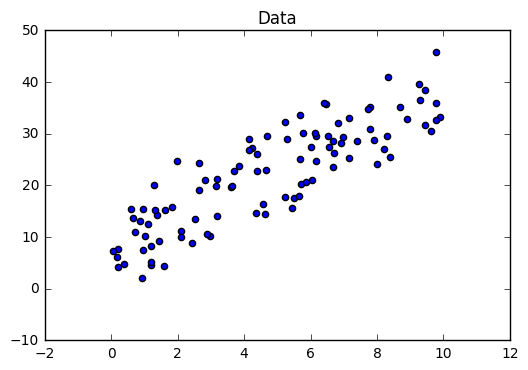

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(xs, noisy_ys)
plt.title("Data")

Great, looks like a linear model will do decently well! Let's finish off the data preparation by converting everything into a `pandas` data frame.

In [16]:
import pandas as pd

data = pd.DataFrame({'input' : xs, 'output' : noisy_ys})
data.head()

,input,output
0,5.488135,17.638656
1,7.151894,32.959813
2,6.027634,27.411213
3,5.448832,15.665277
4,4.236548,27.150905


## 2. Fitting Linear Regression Model with `scikit-learn`

We're ready to fit the linear model now! Let's do that using `scikit-learn`. 

One of the reasons this package is so easy to use is that there is a standard process for how to fit models:

    (1) Instantiate model type
    (2) Fit the model using your data
    (3) Evaluate it on new data
    (4) ???
    (5) Profit
    
Well, maybe not steps 4 and 5 necessarily, but definitely the first three! Let's follow these steps for linear regression.

Here's step 1:

In [17]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

Here's step 2:

(It's important to note that we're not including the `output` variable as part of the data; otherwise, we could always use that and have perfect prediction accuracy! Of course, when we evaluate future data, we won't have the same luxury of having the right answer ahead of time..)

In [18]:
linear_regression_model.fit(data.drop('output', axis = 1), data.output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's take a look at what `scikit-learn` did:

In [19]:
print("Estimated Slope: %.3f (True Slope: 3)" % linear_regression_model.coef_)
print("Estimated Intercept: %.3f (True Intercept: 7)" % linear_regression_model.intercept_)

Estimated Slope: 2.968 (True Slope: 3)
Estimated Intercept: 8.111 (True Intercept: 7)


Hey, not bad for our first stab at some modeling! Let's visualize our fit:

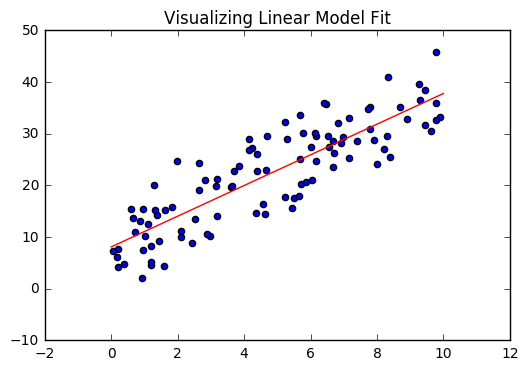

In [20]:
evaluation_xs = np.linspace(0, 10)
evaluation_predicted_ys = linear_regression_model.predict(pd.DataFrame({'input' : evaluation_xs}))
plt.scatter(xs, noisy_ys)
plt.plot(evaluation_xs, evaluation_predicted_ys, color = "red")
plt.title("Visualizing Linear Model Fit")

(In order to visualize the model, we picked some points from $x = 0$ to $x = 50$ using `linspace`, evaluated the predicted output values at those points using the `predict` function, and then plotted the result.)

Looks like we did pretty well!

## 3. Training Data vs. Testing Data

There's something we slightly overlooked in our steps so far; we only have evaluated our model on the same set of points that we used to train our model. That's a little like our professors giving us sample questions ahead of time and then asking the exact same questions on the exam: while it may improve our grades, it won't really evaluate what we know! In the same fashion, we don't want to evaluate our model on just the data we have already seen; therefore, we usually split our data into a _testing_ and _training_ set. We will use the training set to fit our model and use the testing set to fairly evaluate our model performance because the data is "new" since the model didn't see it during the model fitting process. `scikit-learn` makes this super easy:

In [21]:
from sklearn.cross_validation import train_test_split

training_data, testing_data = train_test_split(data, test_size = 0.2)

Cool, now we can train on only the training set like we're supposed to:

In [22]:
fixed_linear_regression_model = LinearRegression()
fixed_linear_regression_model.fit(training_data.drop('output', axis = 1), training_data.output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

A typical way to evaluate how well we're doing is something called the coefficient of determination or $R^2$, which ranges from 0 to 1 with values closer to 1 being better; we can evaluate this on both the training and test set to see how they compare.

In [23]:
training_data_score = fixed_linear_regression_model.score(training_data.drop('output', axis = 1), training_data.output)
testing_data_score = fixed_linear_regression_model.score(testing_data.drop('output', axis = 1), testing_data.output)

print "Coefficient of Determination for Training Data: %.3f" % training_data_score
print "Coefficient of Determination for Test Data: %.3f" % testing_data_score

Coefficient of Determination for Training Data: 0.742
Coefficient of Determination for Test Data: 0.768


As we can see, our score on the training data is higher than our score on the testing data; this makes sense since we've seen the training data before. The key lesson to take away is that we should always evaluate our models on unseen data so that we don't trick ourselves into thinking we havea 